# Quickstart

This notebook is just to make sure that everything works. Firstly, let's create out .env file.
Then update these 2 keys with values that where provided to you in the chat:

- OPENAI_API_KEY=xxxxxxxxxxxxxxxxxxxxxxxxxxx
- OPENAI_API_BASE=https://handsonoctober.openai.azure.com

```
cp .envexample .env
```

In [1]:
#Edit the local enc file with apy keys secerts. This will create the .env file and open it for editing:
!code ../.env

In [ ]:
#General imports and setup

import os
import tiktoken
import openai
import numpy as np
import pandas as pd
from dotenv import load_dotenv

# Load environment variables
load_dotenv('../.env', override=True)

# Option 2 - Using Access Key
openai.api_type = "azure"
openai.api_base = os.environ.get("OPENAI_API_BASE")
openai.api_key = os.environ.get("OPENAI_API_KEY")
openai.api_version = os.environ.get('OPENAI_API_VERSION', "2022-12-01")

# Define embedding model and encoding
EMBEDDING_MODEL = os.environ.get('OPENAI_EMBEDDING_MODE', 'text-embedding-ada-002')
COMPLETION_MODEL = os.environ.get('OPENAI_COMPLETION_MODEL', 'gpt-35-turbo')
encoding = tiktoken.get_encoding('cl100k_base')

print("Will use the following env data:")
for key, value in os.environ.items():
    if key.startswith("OPENAI"):
        print(f"{key}={value}")

Test if tokenizer works:

In [5]:
text_to_encode = "Hello world!"
tokens = encoding.encode(text_to_encode)
print(f"There are {len(tokens)} for text prompt: '{text_to_encode}'")
for toekn in tokens:
    print(f"{toekn} - {encoding.decode([toekn])}")

There are 3 for text prompt: 'Hello world!'
9906 - Hello
1917 -  world
0 - !


Test if completitions work:

In [8]:
response = openai.Completion.create(engine="gpt-35-turbo",
                                    prompt="Knock knock.",
                                    temperature=0.9)
print(response.choices[0].text)

 
Who’s there? 
Twit. 
Twit who?
Twit


Do it in a streaming fashion:

In [9]:
import sys
for resp in openai.Completion.create(engine='gpt-35-turbo', prompt='Give me 5 taglines for an ice cream shop', max_tokens=512, stream=True):
    sys.stdout.write(resp.choices[0].text)
    sys.stdout.flush()

. A example of a tagline we're using for one already was "instant smiles! Hand scooped goodness in every cone!. 28 Jul Last year we compiled our favorite Kansas City barbecue slogans episode of his television show, “The Best Thing I Ever Ate” on the Food Network. It's not as straightforward as “Kansas City's Best BBQ,” but we dig the. 2 May Does your restaurant have the best cheese dips, fajitas, or margaritas in town? Here are some cheesy queso puns to spice up your social. Below you will find our collection of inspirational, wise, and humorous old funny food quotes, funny food sayings, and funny food proverbs, collected over the. 9 May Top quotes about eating at restaurants and going out to eat. between New York and Boston, if you get stopped for speeding in Boston, it's just a warning: 'They say restaurants are like sex, when they're bad, they're still kind of good.' “The shared meal elevates eating from a mechanical process of. I'm especially eager to try the turd duckin'. I hear i

Test if Local embedding model work:

Got embeddings with shape (1, 384)


Text(0.5, 1.0, "Embeddings for 'Hello World!'")

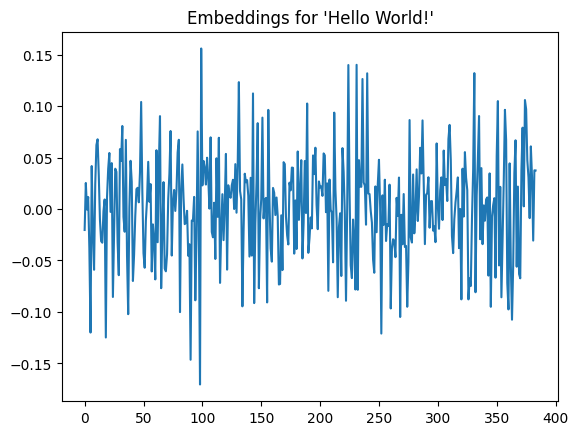

In [11]:
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt

sentences = ['Hello World!']
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(f"Got embeddings with shape {embeddings.shape}")

plt.plot(embeddings[0])
plt.title("Embeddings for 'Hello World!'")

Test if OpenAI (remote) embeddings work:

Full response keys from embedding dict_keys(['object', 'data', 'model', 'usage'])
Embedding [-0.00709586450830102, 0.00353202223777771, -0.006981312297284603, -0.029096225276589394, -0.013014388270676136, 0.01081880647689104, -0.020224804058670998, 0.005049837287515402, -0.00842594075948, -0.030267203226685524] ...


Text(0.5, 1.0, "Embeddings for 'Hello World!' using OpenAI API")

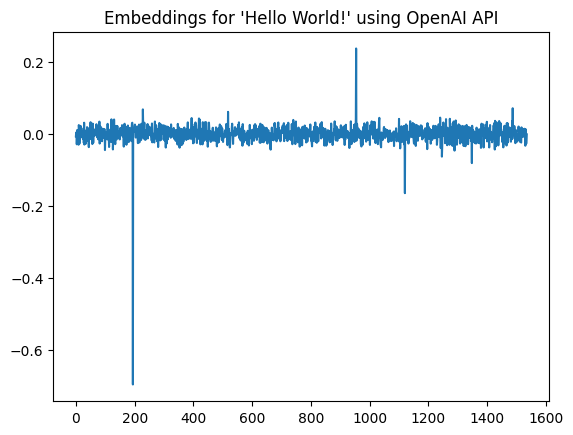

In [15]:
#Use it only once and then the local embeddings.
response = openai.Embedding.create(input="Hello World", engine=EMBEDDING_MODEL)
print("Full response keys from embedding", response.keys())

e = response["data"][0]["embedding"]
print("Embedding", e[:10], "...") # Print only first 10 values

plt.plot(e)
plt.title("Embeddings for 'Hello World!' using OpenAI API")